In [1]:
#https://ieeexplore.ieee.org/document/10549889

In [2]:
!pip install openpyxl ssqueezepy pyt

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 kB 11.7 MB/s eta 0:00:00
  Created wheel for pyt: filename=pyt-1.0.5-py3-none-any.whl size=16716 sha256=863b362460a1b9deca90337d8851291fc29543919054f7b9d2b63f8eab20fc1a
  Stored in directory: /home/work/.cache/pip/wheels/79/44/3a/ec16180c30a94673c22d6e12f30ae7f64bd1319df5395edd56
Successfully built pyt


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

2025-01-17 18:42:27.341335: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-17 18:42:27.341434: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-17 18:42:27.341468: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 18:42:27.353057: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
data = pd.read_csv("WISDM.csv", index_col=0)
data

,user-id,activity,timestamp,X,Y,Z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [6]:
# mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# # 레이블 인코딩
# data['ActivityEncoded'] = data['activity'].map(mapping)
# data

In [7]:
data['X'] = data['X'].astype('float')
data['Y'] = data['Y'].astype('float')
data['X'] = data['Z'].astype('float')

In [8]:
df = data.drop(['user-id', 'timestamp'], axis = 1).copy()
df.head()

,activity,X,Y,Z
0,Jogging,0.503953,12.680544,0.503953
1,Jogging,0.953424,11.264028,0.953424
2,Jogging,-0.081722,10.882658,-0.081722
3,Jogging,3.023717,18.496431,3.023717
4,Jogging,7.205164,12.108489,7.205164


<Axes: xlabel='activity', ylabel='count'>

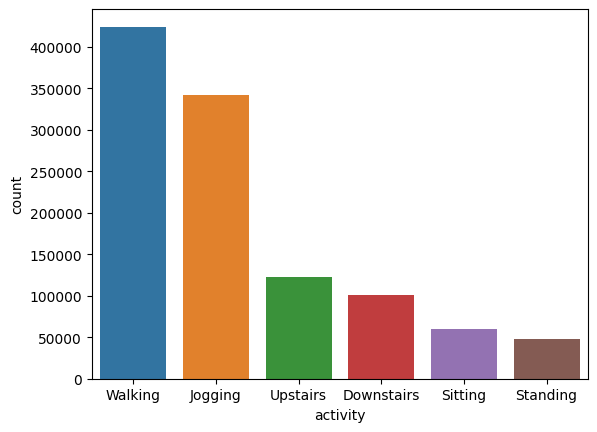

In [9]:
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)

In [10]:
df['activity'].value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [11]:
Walking = df[df['activity']=='Walking'].head(100427).copy()
Jogging = df[df['activity']=='Jogging'].head(100427).copy()
Upstairs = df[df['activity']=='Upstairs'].head(100427).copy()
Downstairs = df[df['activity']=='Downstairs'].head(100427).copy()

In [12]:
dynamic_df = pd.DataFrame()
dynamic_df = pd.concat([dynamic_df, Walking, Jogging, Upstairs, Downstairs])
dynamic_df.shape

(401708, 4)

In [13]:
dynamic_df['activity'].value_counts()

Walking       100427
Jogging       100427
Upstairs      100427
Downstairs    100427
Name: activity, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dynamic_df['label'] = label.fit_transform(dynamic_df['activity'])
dynamic_df.head()

,activity,X,Y,Z,label
597,Walking,2.792171,8.008764,2.792171,3
598,Walking,3.786457,8.621680,3.786457,3
599,Walking,1.307553,16.657684,1.307553,3
600,Walking,-1.184970,10.760075,-1.184970,3
601,Walking,-0.694638,9.234595,-0.694638,3


In [15]:
X = dynamic_df[['X', 'Y', 'Z']]
y = dynamic_df['label']

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['X', 'Y', 'Z'])
scaled_X['label'] = y.values

scaled_X

,X,Y,Z,label
0,0.566252,-0.000509,0.566252,3
1,0.797759,0.098689,0.797759,3
2,0.220577,1.399284,0.220577,3
3,-0.359777,0.444780,-0.359777,3
4,-0.245609,0.197887,-0.245609,3
...,...,...,...,...
401703,0.556433,-0.013256,0.556433,0
401704,0.128011,0.229513,0.128011,0
401705,-0.014020,1.022558,-0.014020,0
401706,-0.726503,0.048245,-0.726503,0


In [17]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 128
STEP = 40

X_data, y_data = create_dataset(scaled_X[["X", "Y", "Z"]], scaled_X.label, TIME_STEPS,
                                  STEP)

trainX, testX,trainy, testy = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
trainX, valX, trainy, valy  = train_test_split(trainX, trainy, test_size = 0.2, stratify=  trainy )
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

(6425, 128, 3) (6425, 1)
(2008, 128, 3) (2008, 1)


In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
enc = enc.fit(trainy)

trainy_one_hot = enc.transform(trainy)
testy_one_hot = enc.transform(testy)
valy_one_hot = enc.transform(valy)

print(trainX.shape, trainy_one_hot.shape, testX.shape, testy_one_hot.shape)

(6425, 128, 3) (6425, 4) (2008, 128, 3) (2008, 4)


In [19]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[   0 1606]
 [   1 1606]
 [   2 1607]
 [   3 1606]]
Test data label statistics::
[[  0 502]
 [  1 502]
 [  2 502]
 [  3 502]]


In [20]:
import os

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate, Layer, RepeatVector, Add, Permute, Multiply

# KERAS_ATTENTION_DEBUG: If set to 1. Will switch to debug mode.
# In debug mode, the class Attention is no longer a Keras layer.
# What it means in practice is that we can have access to the internal values
# of each tensor. If we don't use debug, Keras treats the object
# as a layer, and we can only get the final output.
debug_flag = int(os.environ.get('KERAS_ATTENTION_DEBUG', 0))


# References:
# - https://arxiv.org/pdf/1508.04025.pdf (Luong).
# - https://arxiv.org/pdf/1409.0473.pdf (Bahdanau).
# - https://machinelearningmastery.com/the-bahdanau-attention-mechanism/ (Some more explanation).

class Attention(object if debug_flag else Layer):
    SCORE_LUONG = 'luong'
    SCORE_BAHDANAU = 'bahdanau'

    def __init__(self, units: int = 128, score: str = 'luong', **kwargs):
        super(Attention, self).__init__(**kwargs)
        if score not in {self.SCORE_LUONG, self.SCORE_BAHDANAU}:
            raise ValueError(f'Possible values for score are: [{self.SCORE_LUONG}] and [{self.SCORE_BAHDANAU}].')
        self.units = units
        self.score = score

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        input_dim = int(input_shape[-1])
        with K.name_scope(self.name if not debug_flag else 'attention'):
            # W in W*h_S.
            if self.score == self.SCORE_LUONG:
                self.luong_w = Dense(input_dim, use_bias=False, name='luong_w')
                # dot : last hidden state H_t and every hidden state H_s.
                self.luong_dot = Dot(axes=[1, 2], name='attention_score')
            else:
                # Dense implements the operation: output = activation(dot(input, kernel) + bias)
                self.bahdanau_v = Dense(1, use_bias=False, name='bahdanau_v')
                self.bahdanau_w1 = Dense(input_dim, use_bias=False, name='bahdanau_w1')
                self.bahdanau_w2 = Dense(input_dim, use_bias=False, name='bahdanau_w2')
                self.bahdanau_repeat = RepeatVector(input_shape[1])
                self.bahdanau_tanh = Activation('tanh', name='bahdanau_tanh')
                self.bahdanau_add = Add()

            self.h_t = Lambda(lambda x: x[:, -1, :], output_shape=(input_dim,), name='last_hidden_state')

            # exp / sum(exp) -> softmax.
            self.softmax_normalizer = Activation('softmax', name='attention_weight')

            # dot : score * every hidden state H_s.
            # dot product. SUM(v1*v2). H_s = every source hidden state.
            self.dot_context = Dot(axes=[1, 1], name='context_vector')

            # [Ct; ht]
            self.concat_c_h = Concatenate(name='attention_output')

            # x -> tanh(w_c(x))
            self.w_c = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')
        if not debug_flag:
            # debug: the call to build() is done in call().
            super(Attention, self).build(input_shape)

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

    def __call__(self, inputs, training=None, **kwargs):
        if debug_flag:
            return self.call(inputs, training, **kwargs)
        else:
            return super(Attention, self).__call__(inputs, training, **kwargs)

    # noinspection PyUnusedLocal
    def call(self, inputs, training=None, **kwargs):
        """
        Many-to-one attention mechanism for Keras. Supports:
            - Luong's multiplicative style.
            - Bahdanau's additive style.
        @param inputs: 3D tensor with shape (batch_size, time_steps, input_dim).
        @param training: not used in this layer.
        @return: 2D tensor with shape (batch_size, units)
        @author: philipperemy, felixhao28.
        """
        h_s = inputs
        if debug_flag:
            self.build(h_s.shape)
        h_t = self.h_t(h_s)
        if self.score == self.SCORE_LUONG:
            # Luong's multiplicative style.
            score = self.luong_dot([h_t, self.luong_w(h_s)])
        else:
            # Bahdanau's additive style.
            self.bahdanau_w1(h_s)
            a1 = self.bahdanau_w1(h_t)
            a2 = self.bahdanau_w2(h_s)
            a1 = self.bahdanau_repeat(a1)
            score = self.bahdanau_tanh(self.bahdanau_add([a1, a2]))
            score = self.bahdanau_v(score)
            score = K.squeeze(score, axis=-1)

        alpha_s = self.softmax_normalizer(score)
        context_vector = self.dot_context([h_s, alpha_s])
        a_t = self.w_c(self.concat_c_h([context_vector, h_t]))
        return a_t

    def get_config(self):
        config = super(Attention, self).get_config()
        config.update({'units': self.units, 'score': self.score})
        return config

In [21]:
SINGLE_ATTENTION_VECTOR = False
INPUT_DIMS = 3

def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2])
    a = inputs
    a = tf.keras.layers.Permute((2, 1))(inputs)
    #a = Reshape((input_dim, TIME_STEPS))(a) # this line is not useful. It's just to know which dimension is what.
    a = Dense(input_dim, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((1, 2), name='attention_vec')(a)

    #output_attention_mul = merge([inputs, a_probs], name='attention_mul', mode='mul')
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

# Another way of writing the attention mechanism is suitable for the use of the above error source:https://blog.csdn.net/uhauha2929/article/details/80733255
def attention_3d_block2(inputs, single_attention_vector=False):
    # If the upper layer is LSTM, you need return_sequences=True
    # inputs.shape = (batch_size, time_steps, input_dim)
    time_steps = K.int_shape(inputs)[1]
    input_dim = K.int_shape(inputs)[2]
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    if single_attention_vector:
        a = Lambda(lambda x: K.mean(x, axis=1))(a)
        a = RepeatVector(input_dim)(a)

    a_probs = Permute((2, 1))(a)
    # Multiplied by the attention weight, but there is no summation, it seems to have little effect
    # If you classify tasks, you can do Flatten expansion
    # element-wise
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul


In [22]:
INPUT_DIMS = 3

In [23]:
#score='luong'
score='bahdanau'

In [24]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy_one_hot.shape[1]
n_timesteps, n_features, n_outputs

(128, 3, 4)

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Flatten

inputs= Input(shape=(n_timesteps,n_features))

lstm_out = LSTM(128, return_sequences=True)(inputs)
lstm_out = LSTM(128, return_sequences=True)(lstm_out)
lstm_out = LSTM(128, return_sequences=True)(lstm_out)
lstm_out = Dropout(0.3)(lstm_out)
attention_mul = attention_3d_block(lstm_out)
attention_mul = Flatten()(attention_mul)

##dense layer
dense = Dense(64, activation='relu')(attention_mul)
outputs = Dense(4, activation='softmax')(dense)
model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



2025-01-17 18:42:36.255554: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:8c:00.0, compute capability: 8.0
2025-01-17 18:42:36.257957: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:cc:00.0, compute capability: 8.0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 3)]             0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 128, 128)             67584     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 128, 128)             131584    ['lstm[0][0]']                
                                                                                                  
 lstm_2 (LSTM)               (None, 128, 128)             131584    ['lstm_1[0][0]']              
                                                                                              

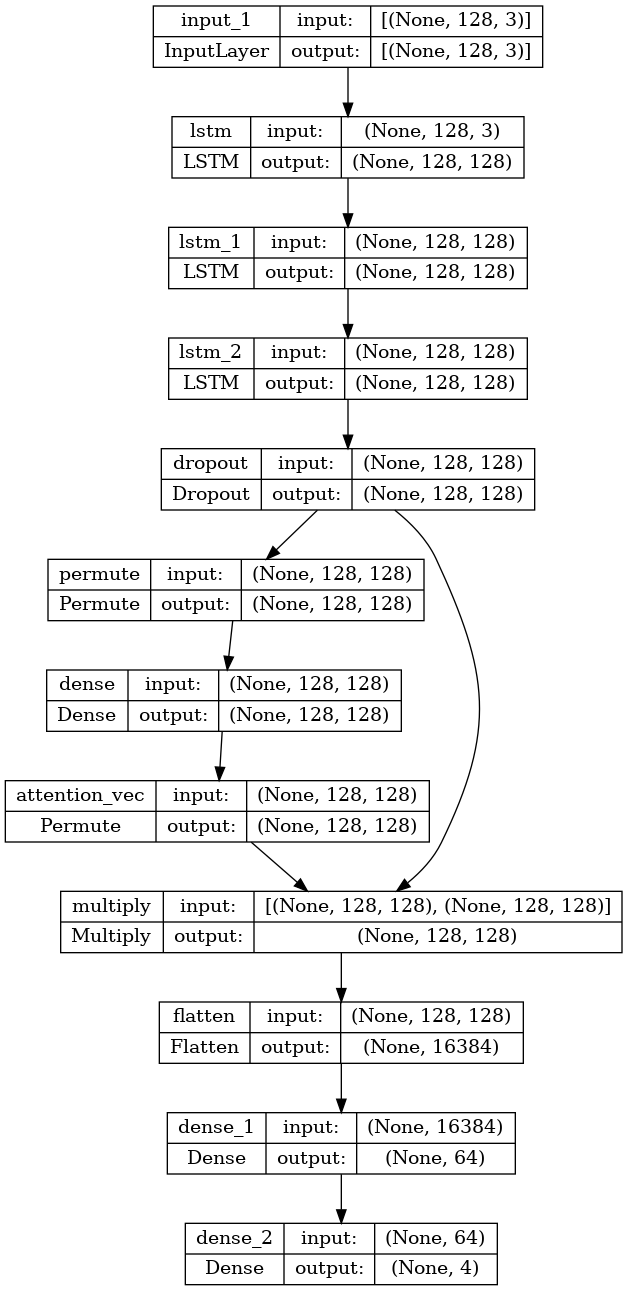

In [26]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


In [27]:
import math
import time
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

start = time.time()
#model_history=model.fit(X_train, y_train_one_hot, epochs=300, batch_size=32, validation_data=(X_val,y_val_one_hot), callbacks = [early_stopping])
model_history=model.fit(trainX, trainy_one_hot, epochs=100, batch_size=32, validation_data=(valX,valy_one_hot))


end = time.time()
print(f"{end - start:.5f} sec")

Epoch 1/100


2025-01-17 18:42:41.100023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2025-01-17 18:42:41.942060: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc8c001beb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-17 18:42:41.942125: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2025-01-17 18:42:41.942135: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2025-01-17 18:42:41.948932: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-17 18:42:42.028350: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


201/201 [==============================] - 11s 29ms/step - loss: 0.9911 - accuracy: 0.5482 - val_loss: 0.7239 - val_accuracy: 0.6559
Epoch 2/100
201/201 [==============================] - 5s 24ms/step - loss: 0.6978 - accuracy: 0.6711 - val_loss: 0.5498 - val_accuracy: 0.7287
Epoch 3/100
201/201 [==============================] - 5s 24ms/step - loss: 0.3698 - accuracy: 0.8590 - val_loss: 0.2884 - val_accuracy: 0.8955
Epoch 4/100
201/201 [==============================] - 5s 24ms/step - loss: 0.2277 - accuracy: 0.9223 - val_loss: 0.2033 - val_accuracy: 0.9309
Epoch 5/100
201/201 [==============================] - 5s 24ms/step - loss: 0.1909 - accuracy: 0.9371 - val_loss: 0.2090 - val_accuracy: 0.9247
Epoch 6/100
201/201 [==============================] - 5s 25ms/step - loss: 0.1518 - accuracy: 0.9500 - val_loss: 0.1534 - val_accuracy: 0.9527
Epoch 7/100
201/201 [==============================] - 5s 25ms/step - loss: 0.1119 - accuracy: 0.9628 - val_loss: 0.1352 - val_accuracy: 0.9508
Epo

201/201 [==============================] - 5s 24ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0654 - val_accuracy: 0.9795
Epoch 58/100
201/201 [==============================] - 5s 24ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.0697 - val_accuracy: 0.9807
Epoch 59/100
201/201 [==============================] - 5s 25ms/step - loss: 7.6417e-04 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9820
Epoch 60/100
201/201 [==============================] - 5s 24ms/step - loss: 2.3103e-04 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9838
Epoch 61/100
201/201 [==============================] - 5s 24ms/step - loss: 2.3559e-04 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9820
Epoch 62/100
201/201 [==============================] - 5s 25ms/step - loss: 1.3508e-04 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9838
Epoch 63/100
201/201 [==============================] - 5s 24ms/step - loss: 8.6583e-05 - accuracy: 1.0000 - val_loss: 0.0633 -

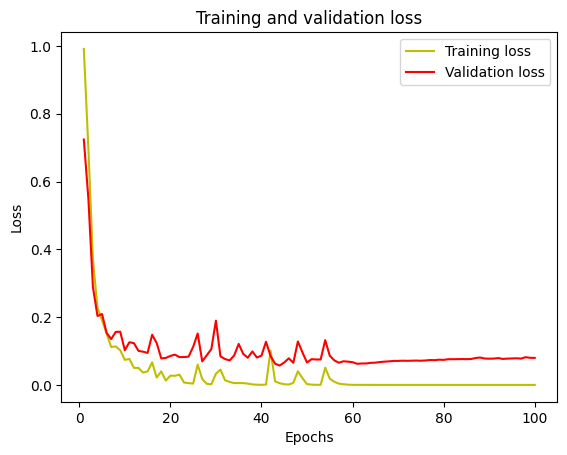

In [28]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

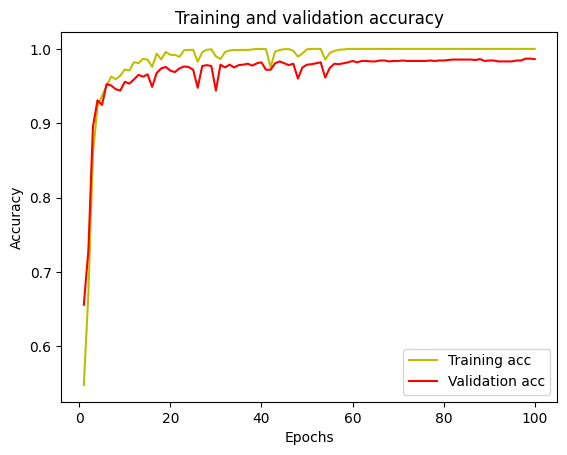

In [29]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

63/63 [==============================] - 1s 9ms/step
Classification Report:
              precision    recall  f1-score   support

     Walking       0.99      0.99      0.99       502
     Jogging       1.00      1.00      1.00       502
    Upstairs       0.98      0.99      0.99       502
  Downstairs       1.00      1.00      1.00       502

    accuracy                           0.99      2008
   macro avg       0.99      0.99      0.99      2008
weighted avg       0.99      0.99      0.99      2008

Test Accuracy: 0.99


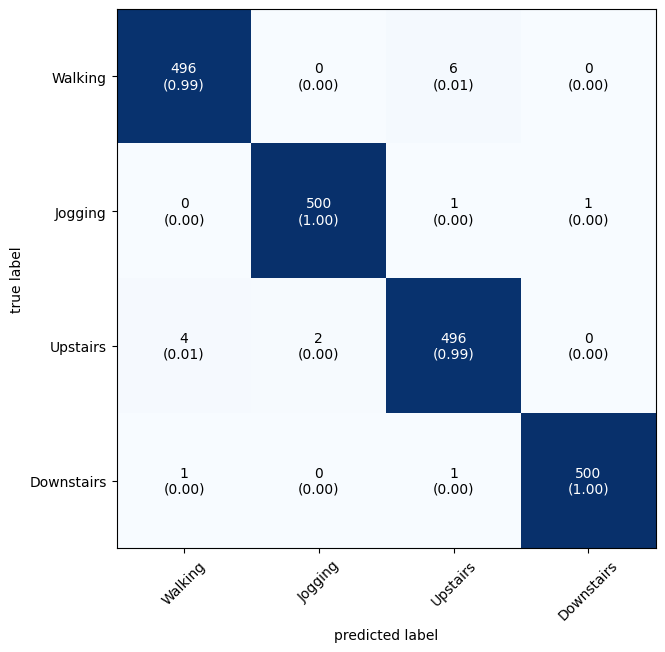

In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# 예측 수행
predy = model.predict(testX)
predy = np.argmax(predy, axis=-1)  # 가장 확률이 높은 클래스를 선택

# 테스트 라벨 (One-Hot Encoding → 정수형 라벨 변환)
testy = np.argmax(testy_one_hot, axis=-1)  # 테스트 레이블 변환

# 라벨 정의
LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs']

# 혼동 행렬 생성
cm = confusion_matrix(testy, predy)

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=cm, class_names=LABELS, show_normed=True, figsize=(7,7))

# 성능 보고서 출력
print("Classification Report:")
print(classification_report(testy, predy, target_names=LABELS))

# 정확도 출력
accuracy = accuracy_score(testy, predy)
print(f"Test Accuracy: {accuracy:.2f}")


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))

[[496   0   6   0]
 [  0 500   1   1]
 [  4   2 496   0]
 [  1   0   1 500]]
0.9920318725099602
0.9920353274094534
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       502
           1       1.00      1.00      1.00       502
           2       0.98      0.99      0.99       502
           3       1.00      1.00      1.00       502

    accuracy                           0.99      2008
   macro avg       0.99      0.99      0.99      2008
weighted avg       0.99      0.99      0.99      2008



201/201 [==============================] - 2s 9ms/step
Classification Report:
              precision    recall  f1-score   support

     Walking       1.00      1.00      1.00      1606
     Jogging       1.00      1.00      1.00      1606
    Upstairs       1.00      1.00      1.00      1607
  Downstairs       1.00      1.00      1.00      1606

    accuracy                           1.00      6425
   macro avg       1.00      1.00      1.00      6425
weighted avg       1.00      1.00      1.00      6425

Test Accuracy: 1.00


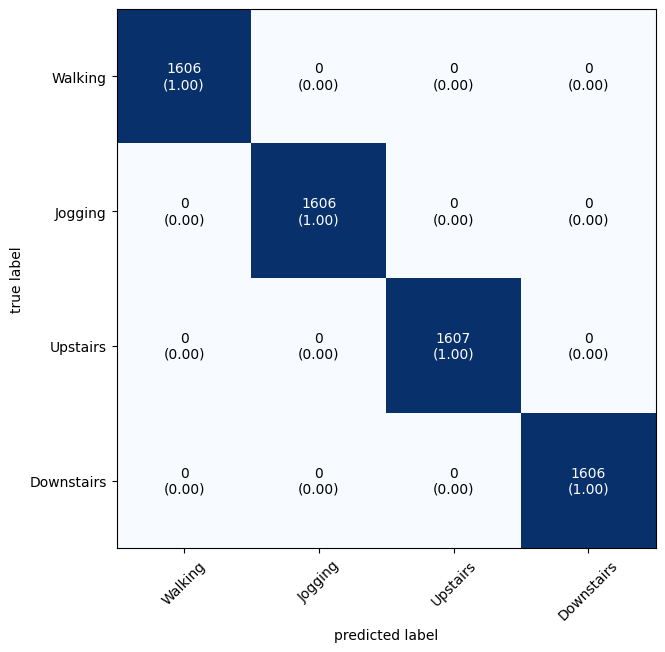

In [34]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# 예측 수행
predy = model.predict(trainX)
predy = np.argmax(predy, axis=-1)  # 가장 확률이 높은 클래스를 선택

# 테스트 라벨 (One-Hot Encoding → 정수형 라벨 변환)
testy = np.argmax(testy_one_hot, axis=-1)  # 테스트 레이블 변환

# 라벨 정의
LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs']

# 혼동 행렬 생성
cm = confusion_matrix(trainy, predy)

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=cm, class_names=LABELS, show_normed=True, figsize=(7,7))

# 성능 보고서 출력
print("Classification Report:")
print(classification_report(trainy, predy, target_names=LABELS))

# 정확도 출력
accuracy = accuracy_score(trainy, predy)
print(f"Test Accuracy: {accuracy:.2f}")
